In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# Reading insurance.csv data from the file with pandas 
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [85]:
# Data consist of float, int, object type data columns.
# Also y variable (charges) is float type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
# Each of numeric type colums mean, std, min and max values as shown under
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [87]:
# Correlation matrix for numeric columns
df.corr()

C:\Users\13792007492\AppData\Local\Temp\ipykernel_26416\1509051829.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


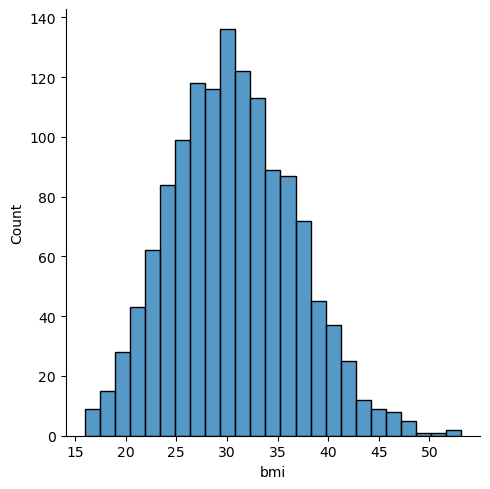

In [88]:
# Distribuiton of Body Mass Index
sns.displot(df, x="bmi")

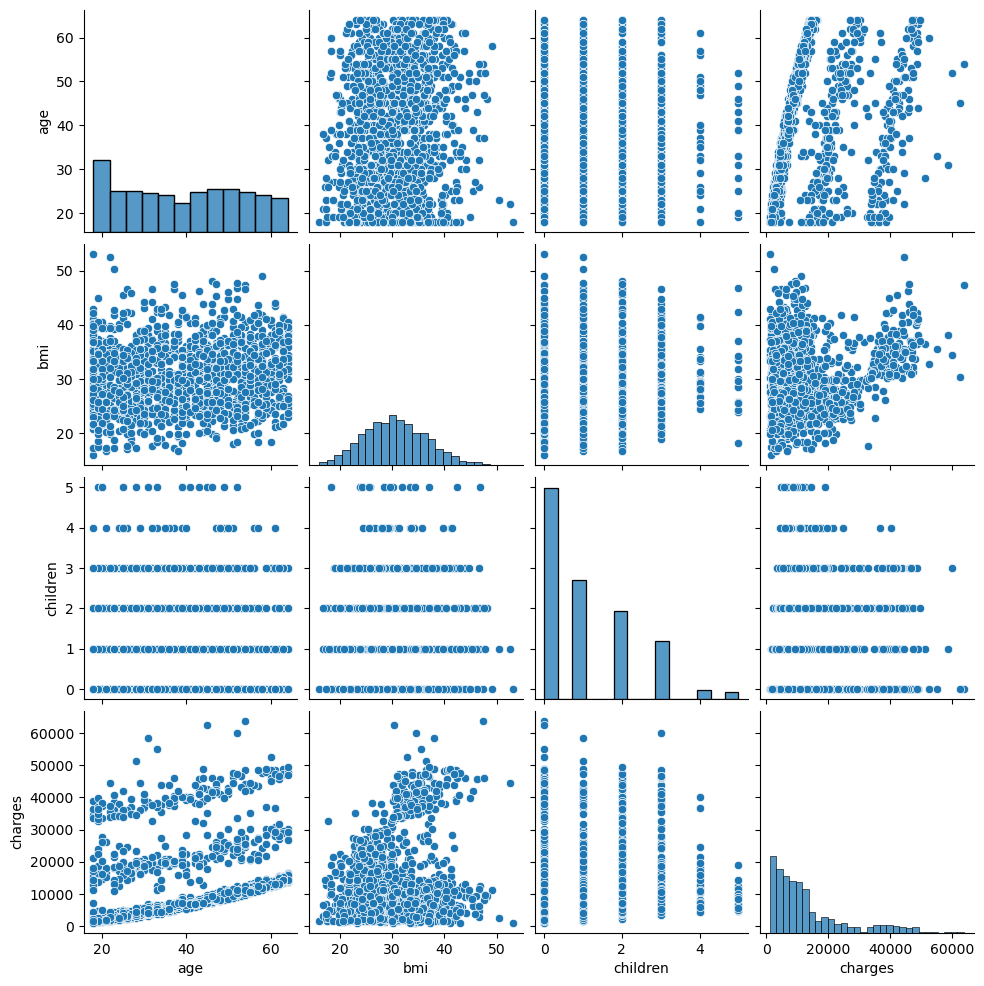

In [89]:
# Relationship for numeric type columns as scatter plot
sns.pairplot(df, kind="scatter")

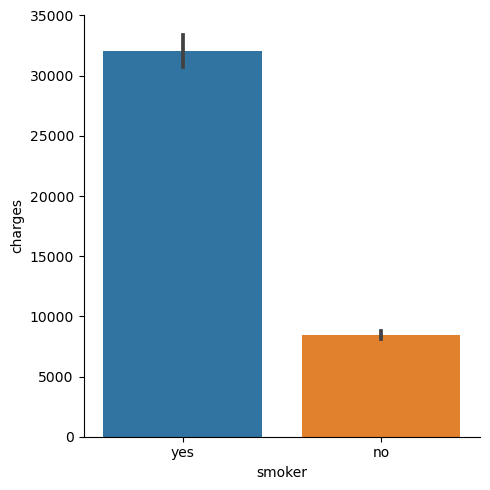

In [90]:
sns.catplot(data=df, x="smoker", y="charges", kind="bar");

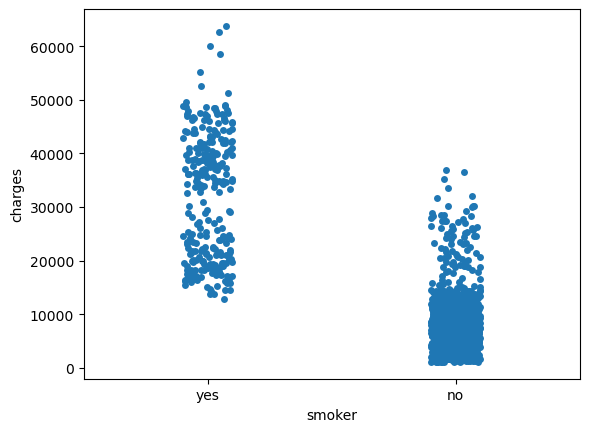

In [91]:
# Charges of Person who are smoker are higher than the other group
sns.stripplot( x="smoker", y="charges", data=df);

In [92]:
gr_rs = df.groupby(['region', 'smoker']).count()
gr_rs = gr_rs.rename(columns={'age':'count'})
gr_rs[['count']].reset_index()

,region,smoker,count
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


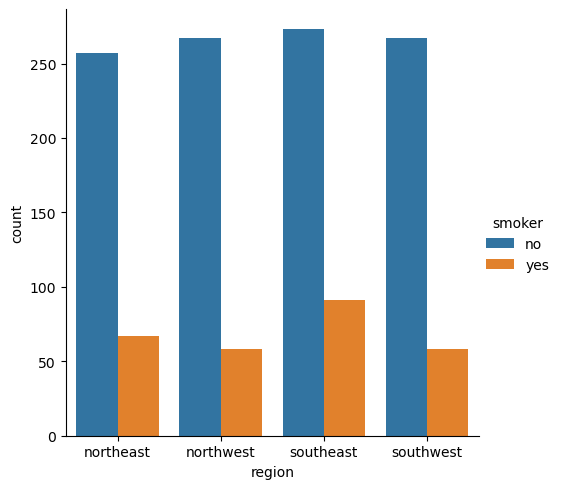

In [93]:
sns.catplot(data=gr_rs[['count']].reset_index(), x="region", y="count", hue="smoker", kind="bar");

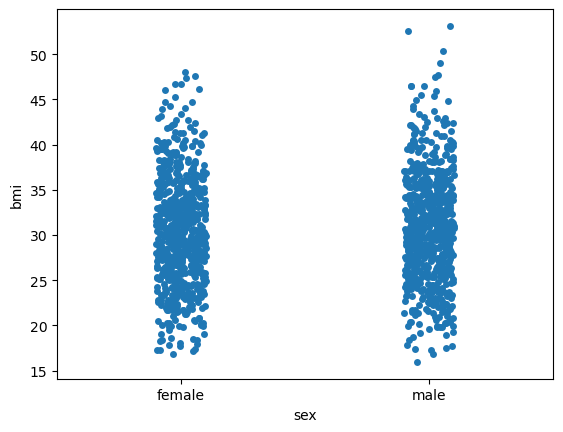

In [94]:
sns.stripplot( x="sex", y="bmi", data=df);

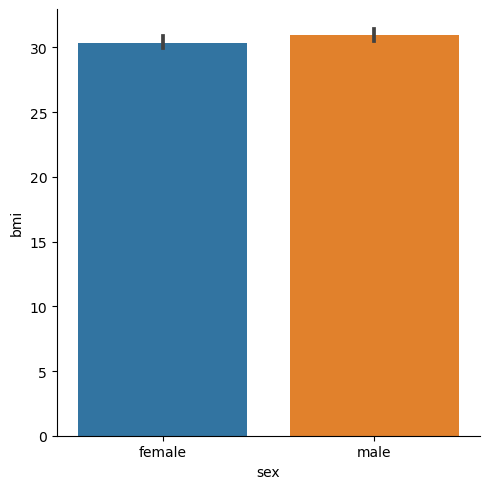

In [95]:
sns.catplot(data=df, x="sex", y="bmi", kind="bar");

In [96]:
# "southeast" with the most "children" who is 18 years old
child = df[df['age']== 18]
child['region'].value_counts()

southeast    37
northeast    32
Name: region, dtype: int64

<Axes: xlabel='region', ylabel='count'>

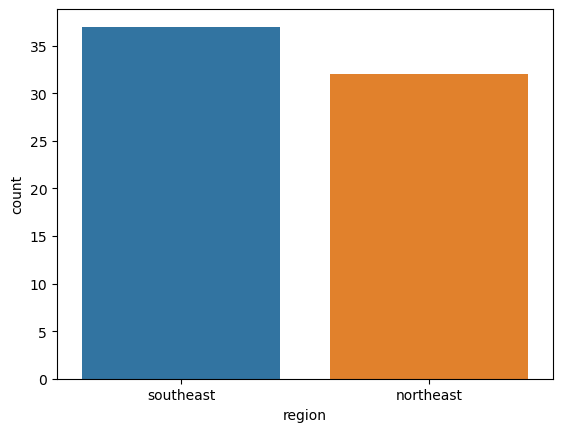

In [97]:
sns.countplot(x=child["region"])

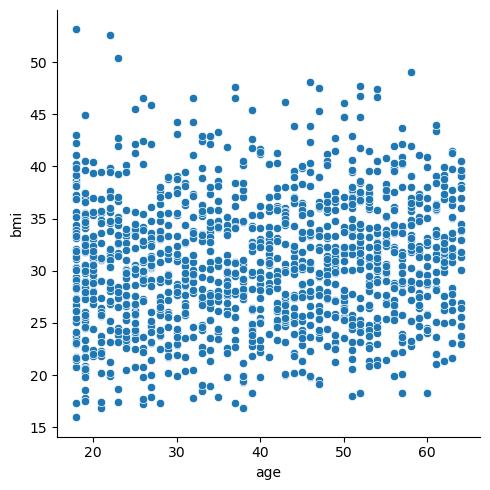

In [98]:
sns.relplot(data=df, x="age", y="bmi")

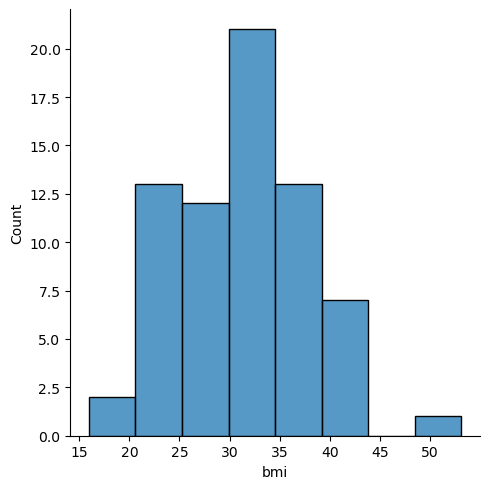

In [99]:
# the relationship between “bmi” and “children”.
sns.displot(child, x="bmi")

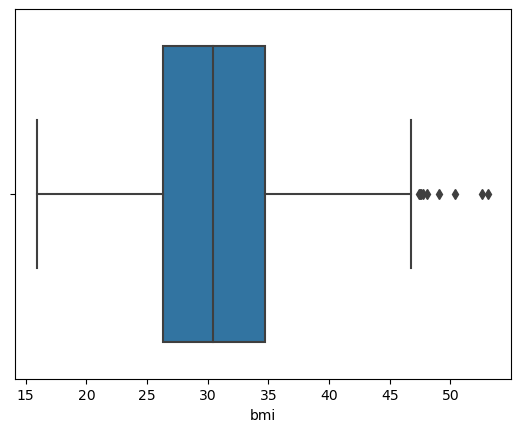

In [100]:
# outlier in the "bmi" variable
sns.boxplot(df, x='bmi');

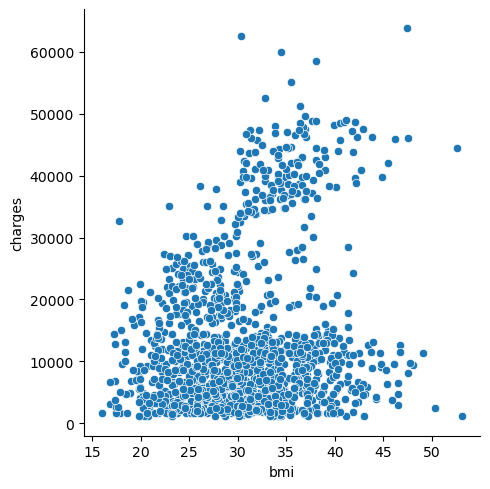

In [101]:
sns.relplot(data=df, x="bmi", y="charges")

<Axes: xlabel='region', ylabel='bmi'>

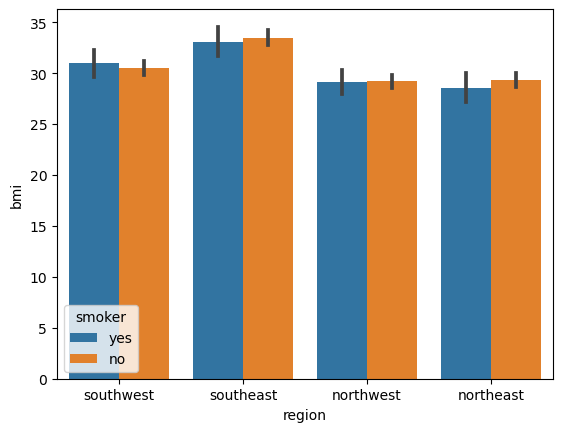

In [102]:
sns.barplot(data=df, x="region", y="bmi", hue="smoker")

## Data Preprocessing

In [103]:
# There are not any Null values
df.isna().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

In [104]:
# one hot encoding
df_one_hot = pd.get_dummies(df)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [105]:
# dependent and independent variables are splitten
y = df_one_hot['charges']
X = df_one_hot.drop(['charges'], axis=1)

In [106]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [107]:
# It is used that Standard Scaling
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaledX = scale.fit_transform(X)

In [108]:
# It is elected 0.3 test_size and static sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.3, random_state=42)

## Model Selection

In [109]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [110]:
linreg_pred = linreg_model.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt

train_score_lr = linreg_model.score(X_train, y_train)
test_score_lr = linreg_model.score(X_test, y_test)

rmse_linreg = sqrt(mean_squared_error(y_test, linreg_pred))
mae_linreg = mean_absolute_error(y_test, linreg_pred)

print(f"RMSE: {rmse_linreg}, MAE: {mae_linreg}")
print(f"Train Score: {train_score_lr}, Test Score: {test_score_lr}")

RMSE: 5812.100272258872, MAE: 4145.4505556276
Train Score: 0.742398009060026, Test Score: 0.769611805436901


In [112]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)


Ridge(alpha=10)

In [113]:
ridge_pred = ridgeReg.predict(X_test)

In [114]:
#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
rmse_ridge = sqrt(mean_squared_error(y_test, ridge_pred))
mae_ridge = mean_absolute_error(y_test, ridge_pred)

print(f"RMSE: {rmse_ridge}, MAE: {mae_ridge}")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

RMSE: 5812.919355758717, MAE: 4149.196751084615
The train score for ridge model is 0.7423661732028849
The test score for ridge model is 0.7695468648966902


In [115]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)

Lasso(alpha=10)

In [116]:
lasso_pred = lasso.predict(X_test)

In [117]:

train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("\nLasso Model............................................\n")

rmse_lasso = sqrt(mean_squared_error(y_test, lasso_pred))
mae_lasso = mean_absolute_error(y_test, lasso_pred)

print(f"RMSE: {rmse_lasso}, MAE: {mae_lasso}")
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

RMSE: 5812.194366985945, MAE: 4144.873278236193
The train score for ls model is 0.7423921651888269
The test score for ls model is 0.7696043456585928


In [118]:
from sklearn.tree import DecisionTreeRegressor

decision = DecisionTreeRegressor()
decision.fit(X_train, y_train)

DecisionTreeRegressor()

In [119]:
decision_pred = decision.predict(X_test)

In [120]:
train_score_ls =decision.score(X_train,y_train)
test_score_ls =decision.score(X_test,y_test)

print("\nDecision Tree Regression Model............................................\n")

rmse_dec = sqrt(mean_squared_error(y_test, decision_pred))
mae_dec = mean_absolute_error(y_test, decision_pred)

print(f"RMSE: {rmse_dec}, MAE: {mae_dec}")
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Decision Tree Regression Model............................................

RMSE: 6101.932539818607, MAE: 2806.89378688806
The train score for ls model is 1.0
The test score for ls model is 0.7460613369279625


In [121]:
# Support ector Machine
from sklearn.svm import SVR
   
# create an SVR model with a linear kernel
svr = SVR(kernel='linear')
  
# train the model on the data
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [122]:
svr_pred = svr.predict(X_test)

In [123]:
train_score_ls =svr.score(X_train,y_train)
test_score_ls =svr.score(X_test,y_test)

print("\nDecision Tree Regression Model............................................\n")

rmse_svr = sqrt(mean_squared_error(y_test, svr_pred))
mae_svr = mean_absolute_error(y_test, svr_pred)

print(f"RMSE: {rmse_svr}, MAE: {mae_svr}")
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Decision Tree Regression Model............................................

RMSE: 11694.714952469802, MAE: 7531.710912941705
The train score for ls model is 0.04726556376612423
The test score for ls model is 0.06723271343059645


In [124]:
# The best model is Ridge Regression for MAE and Test Score

## Hyper-Parameter Optimization

In [131]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [136]:
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
# space['normalize'] = [True, False]

In [137]:
search = RandomizedSearchCV(ridgeReg, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4292.17336222205
Best Hyperparameters: {'alpha': 1.0514533396856733e-05, 'fit_intercept': True, 'solver': 'lsqr'}
